## Numpy

In [1]:
import numpy as np
import random

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [54]:
import time
t1_a = time.time()
a=[]
for x in range(10000):
    a.append(random.randint(0,100))

a = [x+1 for x in a]
t2_a = time.time()

t1_b = time.time()
b=np.random.randint(100,size=10000)
b+=1
t2_b = time.time()


print("time of first table: ", t2_a - t1_a) 
print("time of second table: ", t2_b - t1_b) 

time of first table:  0.017660856246948242
time of second table:  0.000431060791015625


In [51]:
def timit(fun):
    def wrap(*args):
        t1 = time.time()
        x=fun(*args)
        t2 = time.time()
        print("czas dzialania: ", t2 - t1)
        return x
    return wrap

### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [33]:
from math import sin, cos

t1_a = time.time()
result_a = [None] * len(a)
result_b = [None] * len(b)


result_a = [sin(x)+cos(x) for x in a]
t2_a = time.time()

print("time of firt operation: ", t2_a - t1_a)

t1_b = time.time()
result_b = np.cos(b)+np.sin(b)
t2_b = time.time()
print("time of second operation: ", t2_b - t1_b)


time of firt operation:  0.008440732955932617
time of second operation:  0.0015637874603271484


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [72]:
@timit
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result
@timit
def cube_sum_opt(x):
    x = np.array(x)
    return np.sum(x**3)

@timit
def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
#         print(x[i] - m)
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

@timit
def almost_variance_opt(x):
    x = np.array(x)
    return np.sum((x - np.mean(x))**4)/len(x)

x = [1,2,3,4,5]
print(cube_sum(x))
print(cube_sum_opt(x))
print(almost_variance(x))
print(almost_variance_opt(x))

czas dzialania:  8.106231689453125e-06
225
czas dzialania:  0.000141143798828125
225
czas dzialania:  1.6927719116210938e-05
6.8
czas dzialania:  0.00015211105346679688
6.8


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [87]:
a = np.arange(10).reshape(10,1)
b = np.arange(10)

print(a*b)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [157]:
x = np.random.randint(10,size=(10,5))
print(x)


[[0 7 8 9 7]
 [7 1 6 4 8]
 [3 2 2 5 2]
 [0 1 8 5 3]
 [7 5 7 7 8]
 [2 1 6 7 2]
 [6 7 1 1 4]
 [1 1 3 9 6]
 [2 3 9 9 8]
 [9 2 7 3 1]]


In [170]:
b = np.vstack(x).reshape(5,10)
# print(np.sum(x,b))

def dist_opt(x):
    # Rozszerzenie wymiarów dla broadcastingu
    x1 = x[:, None, :]
    x2 = x[None, :, :]
    # Obliczenie odległości euklidesowej

    print(np.sum((x1 - x2)**2, axis=2))
    

def dist(x):
    sum = np.zeros((10,10))
    for i in range(len(x)):
        for j in range(len(x)):
            sum[i][j]= np.sum((x[i]-x[j])**2)

    print(sum)
dist(x)
dist_opt(x)

[[  0. 115. 111.  68.  59.  73. 158.  63.  22. 179.]
 [115.   0.  70.  79.  26.  70.  87.  74.  63.  56.]
 [111.  70.   0.  47.  90.  22.  55.  38. 103.  66.]
 [ 68.  79.  47.   0.  95.  13. 138.  51.  50.  91.]
 [ 59.  26.  90.  95.   0.  78.  93.  76.  37.  78.]
 [ 73.  70.  22.  13.  78.   0. 117.  30.  53.  68.]
 [158.  87.  55. 138.  93. 117.   0. 133. 176.  83.]
 [ 63.  74.  38.  51.  76.  30. 133.   0.  45. 142.]
 [ 22.  63. 103.  50.  37.  53. 176.  45.   0. 139.]
 [179.  56.  66.  91.  78.  68.  83. 142. 139.   0.]]
[[  0 115 111  68  59  73 158  63  22 179]
 [115   0  70  79  26  70  87  74  63  56]
 [111  70   0  47  90  22  55  38 103  66]
 [ 68  79  47   0  95  13 138  51  50  91]
 [ 59  26  90  95   0  78  93  76  37  78]
 [ 73  70  22  13  78   0 117  30  53  68]
 [158  87  55 138  93 117   0 133 176  83]
 [ 63  74  38  51  76  30 133   0  45 142]
 [ 22  63 103  50  37  53 176  45   0 139]
 [179  56  66  91  78  68  83 142 139   0]]


### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [183]:
def white(x):
    x = (x-np.mean(x,axis=0)/np.std(x,axis=0))
    print(x)

x = np.arange(10).reshape(5,2)
white(x)

[[-1.41421356 -0.76776695]
 [ 0.58578644  1.23223305]
 [ 2.58578644  3.23223305]
 [ 4.58578644  5.23223305]
 [ 6.58578644  7.23223305]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [197]:
def closest(x,A):
    A=A.reshape(-1,1)
    return A[np.argmin(np.absolute(A-x))]
x = 1.5
A = np.array([1,-4,3,123]).reshape(-1,4)
print(closest(x,A))

[1]


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [9]:
def poly (x0,a):
    k = len(a)
    x = np.ones(k)*x0
    x[0]=1
    x = np.cumprod(x)
    print(x)
    print(x*a)
    print(np.sum(x*a))
    return np.sum(x*a)
    
a = np.array([2,2,4])
x = 2
poly(x,a)
np.cumprod(a)

[1. 2. 4.]
[ 2.  4. 16.]
22.0


array([ 2,  4, 16])

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

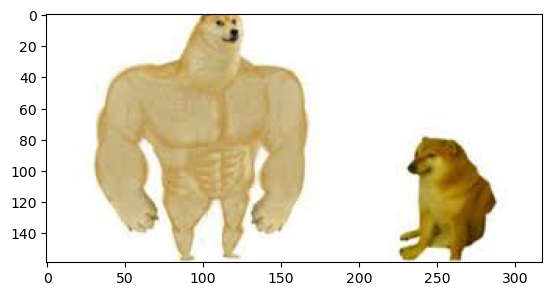

In [30]:
img = mpimg.imread('doggo.jpeg')
plt.imshow(img);

In [54]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

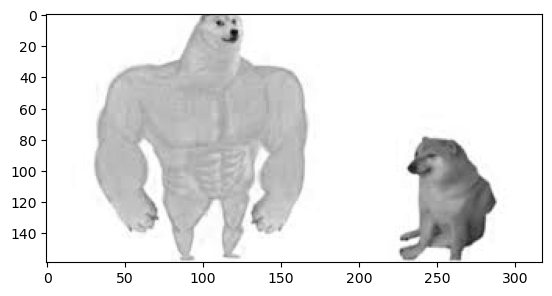

In [53]:
R = 0.2126 
G = 0.7152
B = 0.0722

scale = [0.5,0.1,0.4]
szary_img = R * img[:,:,1] + G *img[:,:,0] + B*img[:,:,2] # we're making it 2d (thats why we need to specify the color map)
plt.imshow(szary_img, cmap='gray')  # Specify the colormap here
szary_img

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [64]:
def interpol(x1,x2,lam):
    x = lam * x1.reshape(-1,1) + (1-lam)*x2.reshape(-1,1)
    return x

x1 = np.array([5,4])
x2 = np.array([3,20])
lam = np.array([0.1,0.2,0.4])

print(interpol(x1,x2,lam))

[[ 3.2  3.4  3.8]
 [18.4 16.8 13.6]]
